**Nama : M Daffa Alfikri**<br>
**NIM : 211351076**<br>
**Kelas : IF PAGI A**<br>

#Import Library

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=6df9ac563268b72f31c86634c6889362084921ba4acd280d4fd43512267a5438
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
!pip install apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2455 sha256=f9264f4741418bf299c1d72bd01533820eab81ecef915ef8db7c667a916abd19
  Stored in directory: /root/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings

#Import Dataset Kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"a78463a07a1a19d94875f1f001178055"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [9]:
!kaggle datasets download -d rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

  0% 0.00/455k [00:00<?, ?B/s]
100% 455k/455k [00:00<00:00, 123MB/s]


In [10]:
!mkdir market
!unzip groceries-dataset-for-market-basket-analysismba.zip -d market
!ls market

Archive:  groceries-dataset-for-market-basket-analysismba.zip
  inflating: market/Groceries data.csv  
  inflating: market/basket.csv       
 basket.csv  'Groceries data.csv'


#Data Discovery

In [11]:
df = pd.read_csv("market/Groceries data.csv")
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (38765, 7)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [12]:
df.sample(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
27738,4207,2014-10-21,candy,2014,10,21,1
18521,1275,2015-10-18,specialty chocolate,2015,10,18,6
9249,4723,2014-07-11,other vegetables,2014,7,11,4
16533,1588,2015-10-13,zwieback,2015,10,13,1
2977,3643,2015-09-20,bottled beer,2015,9,20,6
24602,4207,2015-08-28,white bread,2015,8,28,4
19260,4345,2015-01-28,pip fruit,2015,1,28,2
32793,2082,2014-10-10,rolls/buns,2014,10,10,4
12723,4960,2014-10-19,root vegetables,2014,10,19,6
21478,1661,2015-08-11,white wine,2015,8,11,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [14]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [16]:
val_counts = df["itemDescription"].value_counts()
val_counts.tail(10)

whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

#Data Preparation

In [17]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB
None


In [18]:
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4
5           4941  2015-02-14        rolls/buns  2015      2   14            5
6           4501  2015-08-05  other vegetables  2015      8    5            2
7           3803  2015-12-23        pot plants  2015     12   23            2
8           2762  2015-03-20        whole milk  2015      3   20            4
9           4119  2015-12-02    tropical fruit  2015     12    2            2


In [19]:
print('Unique itemDescription: ', df['itemDescription'].nunique())

Unique itemDescription:  167


In [20]:
print('Unique itemDescription: ', df['itemDescription'].nunique())
print( '\n', df['itemDescription'].unique())

Unique itemDescription:  167

 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whippe

In [21]:
print(df.isnull().sum().sort_values(ascending=False))

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


In [24]:
print(df[df['itemDescription']=='month'])

Empty DataFrame
Columns: [Member_number, Date, itemDescription, year, month, day, day_of_week, Year, Month, Day]
Index: []


In [25]:
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [26]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
 7   Year             38765 non-null  object
 8   Month            38765 non-null  object
 9   Day              38765 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.0+ MB
None
   Member_number        Date   itemDescription  year  month  day  day_of_week  \
0           1808  2015-07-21    tropical fruit  2015      7   21            1   
1           2552  2015-05-01        whole milk  2015      5    1            4   
2           2300  2015-09-19         pip fruit  2015 

#EDA

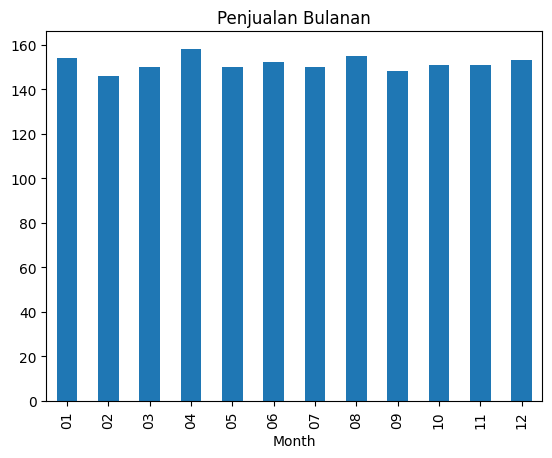

In [31]:
df.groupby('Month')['itemDescription'].nunique().plot(kind='bar', title='Penjualan Bulanan')
plt.show()

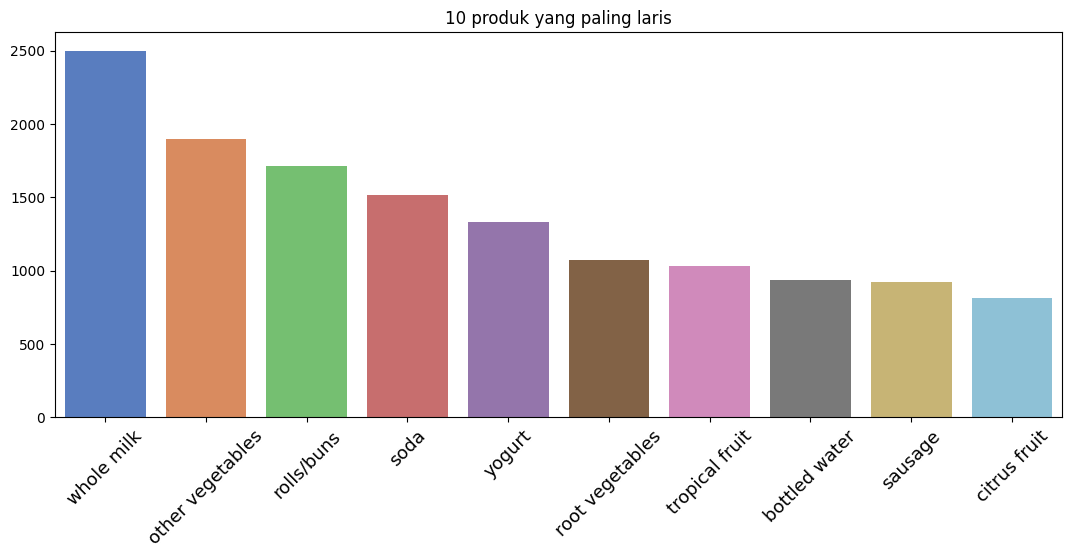

In [32]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = df["itemDescription"].value_counts()[:10].index,
            y = df["itemDescription"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris')
plt.show()

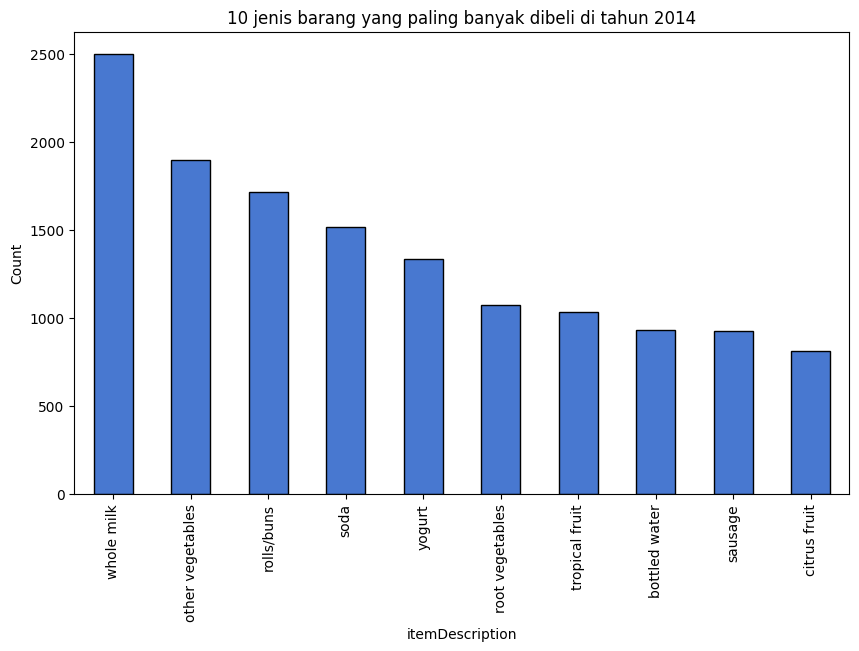

In [38]:
df_2014 = df[df['year'] == 2014]
top_10_2014 = df['itemDescription'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_2014.plot(kind='bar', edgecolor='black')
plt.xlabel('itemDescription')
plt.ylabel('Count')
plt.title('10 jenis barang yang paling banyak dibeli di tahun 2014')
plt.show()

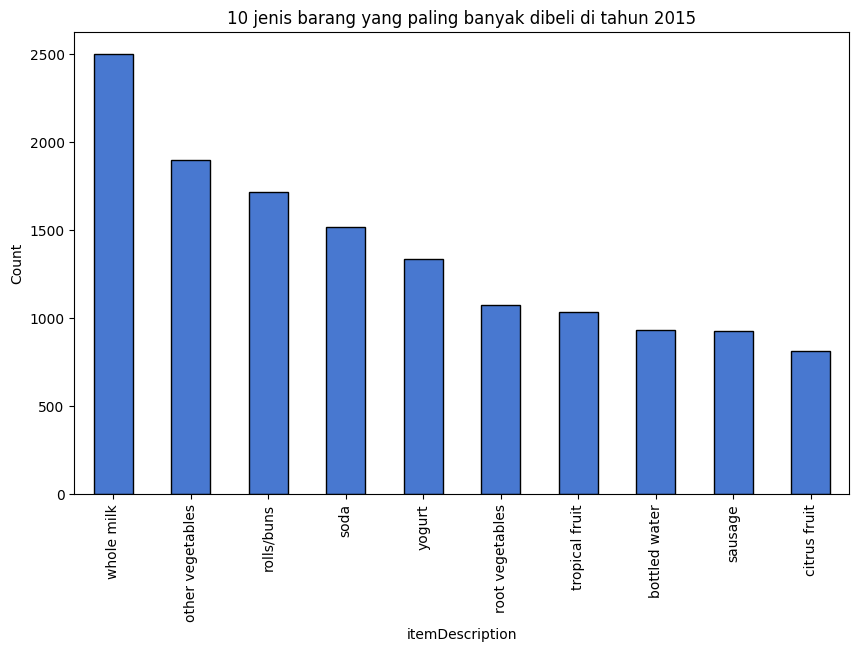

In [37]:

f_2015 = df[df['year'] == 2015]
top_10_2015 = df['itemDescription'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_2015.plot(kind='bar', edgecolor='black')
plt.xlabel('itemDescription')
plt.ylabel('Count')
plt.title('10 jenis barang yang paling banyak dibeli di tahun 2015')
plt.show()

#Visualisasi

In [39]:
most_sold = df['itemDescription'].value_counts().head(20)

print('Most Sold itemDescription: \n')
print(most_sold)

Most Sold itemDescription: 

whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: itemDescription, dtype: int64


In [40]:
transaction_count = df.groupby(by='itemDescription')[['Member_number']].count().sort_values(by='Member_number', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Member_number
itemDescription,
whole milk,6.454276
other vegetables,4.896169
rolls/buns,4.426674
soda,3.905585
yogurt,3.441249


In [41]:
transaction_list = []

for i in df['Member_number'].unique():
    tlist = list(set(df[df['Member_number']==i]['itemDescription']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

3898


In [43]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [44]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
15185,"(yogurt, rolls/buns)","(whole milk, sausage, other vegetables)",0.013597,0.122120,2.428689
15184,"(whole milk, sausage, other vegetables)","(yogurt, rolls/buns)",0.013597,0.270408,2.428689
15175,"(yogurt, rolls/buns, other vegetables)","(whole milk, sausage)",0.013597,0.259804,2.428575
15194,"(whole milk, sausage)","(yogurt, rolls/buns, other vegetables)",0.013597,0.127098,2.428575
12801,"(whole milk, sausage)","(yogurt, curd)",0.010005,0.093525,2.322046
...,...,...,...,...,...
7641,"(frozen vegetables, other vegetables)",(soda),0.014366,0.314607,1.003549
985,(cream cheese ),(pip fruit),0.015136,0.171014,1.002428
984,(pip fruit),(cream cheese ),0.015136,0.088722,1.002428
477,(whipped/sour cream),(brown bread),0.021036,0.135987,1.000144


#Modeling

In [52]:
import itertools

def generate_candidates(prev_candidates, k):
    candidates = set()
    for i in range(len(prev_candidates)):
        for j in range(i + 1, len(prev_candidates)):
            itemset1 = set(prev_candidates[i])
            itemset2 = set(prev_candidates[j])
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(tuple(sorted(union_set)))
    return list(candidates)

def prune_candidates(candidates, prev_frequent_sets):
    pruned_candidates = []
    for candidate in candidates:
        subsets = [set(x) for x in itertools.combinations(candidate, len(candidate) - 1)]
        is_valid = all(subset in prev_frequent_sets for subset in subsets)
        if is_valid:
            pruned_candidates.append(candidate)
    return pruned_candidates

def apriori(transactions, min_support):
    itemsets = [frozenset([item]) for item in set(item for transaction in transactions for item in transaction)]
    frequent_itemsets = []

    k = 2
    while itemsets:
        candidates = generate_candidates(itemsets, k)
        item_counts = {candidate: 0 for candidate in candidates}

        for transaction in transactions:
            for candidate in candidates:
                if set(candidate).issubset(transaction):
                    item_counts[candidate] += 1

        frequent_itemsets_k = [itemset for itemset, count in item_counts.items() if count / len(transactions) >= min_support]
        frequent_itemsets.extend(frequent_itemsets_k)

        itemsets = prune_candidates(generate_candidates(frequent_itemsets_k, k+1), frequent_itemsets_k)
        k += 1

    return frequent_itemsets

# Contoh Penggunaan
transactions = [
    ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
     'tropical fruit', 'bottled water', 'sausage', 'citrus fruit', 'pastry',
     'pip fruit '],
]

min_support = 0.2
result = apriori(transactions, min_support)
print("Frequent Itemsets:")
print(result)

Frequent Itemsets:
[('pastry', 'whole milk'), ('citrus fruit', 'pastry'), ('other vegetables', 'sausage'), ('bottled water', 'pastry'), ('bottled water', 'citrus fruit'), ('rolls/buns', 'whole milk'), ('other vegetables', 'whole milk'), ('citrus fruit', 'rolls/buns'), ('bottled water', 'rolls/buns'), ('pastry', 'yogurt'), ('rolls/buns', 'yogurt'), ('other vegetables', 'yogurt'), ('whole milk', 'yogurt'), ('pastry', 'pip fruit '), ('soda', 'whole milk'), ('pastry', 'tropical fruit'), ('pip fruit ', 'rolls/buns'), ('other vegetables', 'pip fruit '), ('pastry', 'soda'), ('rolls/buns', 'soda'), ('rolls/buns', 'tropical fruit'), ('soda', 'yogurt'), ('other vegetables', 'soda'), ('other vegetables', 'tropical fruit'), ('citrus fruit', 'sausage'), ('bottled water', 'sausage'), ('citrus fruit', 'whole milk'), ('soda', 'tropical fruit'), ('bottled water', 'whole milk'), ('pip fruit ', 'sausage'), ('sausage', 'whole milk'), ('bottled water', 'yogurt'), ('pip fruit ', 'whole milk'), ('citrus frui